In [47]:
import pandas as pd
import torch
from torch import nn

In [48]:
print(torch.cuda.is_available())

True


In [49]:
df = pd.read_csv("./data/used_cars.csv")

In [50]:
df.head()

,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price
0,Ford,Utility Police Interceptor Base,2013,"51,000 mi.",E85 Flex Fuel,300.0HP 3.7L V6 Cylinder Engine Flex Fuel Capa...,6-Speed A/T,Black,Black,At least 1 accident or damage reported,Yes,"$10,300"
1,Hyundai,Palisade SEL,2021,"34,742 mi.",Gasoline,3.8L V6 24V GDI DOHC,8-Speed Automatic,Moonlight Cloud,Gray,At least 1 accident or damage reported,Yes,"$38,005"
2,Lexus,RX 350 RX 350,2022,"22,372 mi.",Gasoline,3.5 Liter DOHC,Automatic,Blue,Black,None reported,NaN,"$54,598"
3,INFINITI,Q50 Hybrid Sport,2015,"88,900 mi.",Hybrid,354.0HP 3.5L V6 Cylinder Engine Gas/Electric H...,7-Speed A/T,Black,Black,None reported,Yes,"$15,500"
4,Audi,Q3 45 S line Premium Plus,2021,"9,835 mi.",Gasoline,2.0L I4 16V GDI DOHC Turbo,8-Speed Automatic,Glacier White Metallic,Black,None reported,NaN,"$34,999"


In [51]:
price = df["price"]

In [52]:
price = price.str.replace('$' , "")
price = price.str.replace(',' , "")
price = price.astype(int)
price

0        10300
1        38005
2        54598
3        15500
4        34999
         ...  
4004    349950
4005     53900
4006     90998
4007     62999
4008     40000
Name: price, Length: 4009, dtype: int32

In [53]:
milage = df["milage"]
milage = milage.str.replace("," , "")
milage = milage.str.replace("mi." , "")
milage = milage.astype(int)

In [54]:
milage

0       51000
1       34742
2       22372
3       88900
4        9835
        ...  
4004      714
4005    10900
4006     2116
4007    33000
4008    43000
Name: milage, Length: 4009, dtype: int32

In [55]:
age = df["model_year"].max() - df["model_year"]


In [56]:
model = nn.Linear(2 , 1)
loss_fn = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr = 1e-20)


In [57]:
# Creating the tensor matrix
X = torch.column_stack([
    torch.tensor(age, dtype=torch.float32),
    torch.tensor(milage, dtype=torch.float32)
])

Y = torch.column_stack([
    torch.tensor(price , dtype=torch.float32)
])

In [58]:
Y

tensor([[10300.],
        [38005.],
        [54598.],
        ...,
        [90998.],
        [62999.],
        [40000.]])

In [59]:
for i in range(0, 1000):
    optimizer.zero_grad()
    outputs = model(X)
    loss = loss_fn(outputs, Y)
    loss.backward()
    optimizer.step()
    print(loss)
#     if i % 100 == 0: 
#         print(model.bias)
#         print(model.weight)

tensor(7.8006e+09, grad_fn=<MseLossBackward0>)
tensor(7.8006e+09, grad_fn=<MseLossBackward0>)
tensor(7.8006e+09, grad_fn=<MseLossBackward0>)
tensor(7.8006e+09, grad_fn=<MseLossBackward0>)
tensor(7.8006e+09, grad_fn=<MseLossBackward0>)
tensor(7.8006e+09, grad_fn=<MseLossBackward0>)
tensor(7.8006e+09, grad_fn=<MseLossBackward0>)
tensor(7.8006e+09, grad_fn=<MseLossBackward0>)
tensor(7.8006e+09, grad_fn=<MseLossBackward0>)
tensor(7.8006e+09, grad_fn=<MseLossBackward0>)
tensor(7.8006e+09, grad_fn=<MseLossBackward0>)
tensor(7.8006e+09, grad_fn=<MseLossBackward0>)
tensor(7.8006e+09, grad_fn=<MseLossBackward0>)
tensor(7.8006e+09, grad_fn=<MseLossBackward0>)
tensor(7.8006e+09, grad_fn=<MseLossBackward0>)
tensor(7.8006e+09, grad_fn=<MseLossBackward0>)
tensor(7.8006e+09, grad_fn=<MseLossBackward0>)
tensor(7.8006e+09, grad_fn=<MseLossBackward0>)
tensor(7.8006e+09, grad_fn=<MseLossBackward0>)
tensor(7.8006e+09, grad_fn=<MseLossBackward0>)
tensor(7.8006e+09, grad_fn=<MseLossBackward0>)
tensor(7.8006

tensor(7.8006e+09, grad_fn=<MseLossBackward0>)
tensor(7.8006e+09, grad_fn=<MseLossBackward0>)
tensor(7.8006e+09, grad_fn=<MseLossBackward0>)
tensor(7.8006e+09, grad_fn=<MseLossBackward0>)
tensor(7.8006e+09, grad_fn=<MseLossBackward0>)
tensor(7.8006e+09, grad_fn=<MseLossBackward0>)
tensor(7.8006e+09, grad_fn=<MseLossBackward0>)
tensor(7.8006e+09, grad_fn=<MseLossBackward0>)
tensor(7.8006e+09, grad_fn=<MseLossBackward0>)
tensor(7.8006e+09, grad_fn=<MseLossBackward0>)
tensor(7.8006e+09, grad_fn=<MseLossBackward0>)
tensor(7.8006e+09, grad_fn=<MseLossBackward0>)
tensor(7.8006e+09, grad_fn=<MseLossBackward0>)
tensor(7.8006e+09, grad_fn=<MseLossBackward0>)
tensor(7.8006e+09, grad_fn=<MseLossBackward0>)
tensor(7.8006e+09, grad_fn=<MseLossBackward0>)
tensor(7.8006e+09, grad_fn=<MseLossBackward0>)
tensor(7.8006e+09, grad_fn=<MseLossBackward0>)
tensor(7.8006e+09, grad_fn=<MseLossBackward0>)
tensor(7.8006e+09, grad_fn=<MseLossBackward0>)
tensor(7.8006e+09, grad_fn=<MseLossBackward0>)
tensor(7.8006

tensor(7.8006e+09, grad_fn=<MseLossBackward0>)
tensor(7.8006e+09, grad_fn=<MseLossBackward0>)
tensor(7.8006e+09, grad_fn=<MseLossBackward0>)
tensor(7.8006e+09, grad_fn=<MseLossBackward0>)
tensor(7.8006e+09, grad_fn=<MseLossBackward0>)
tensor(7.8006e+09, grad_fn=<MseLossBackward0>)
tensor(7.8006e+09, grad_fn=<MseLossBackward0>)
tensor(7.8006e+09, grad_fn=<MseLossBackward0>)
tensor(7.8006e+09, grad_fn=<MseLossBackward0>)
tensor(7.8006e+09, grad_fn=<MseLossBackward0>)
tensor(7.8006e+09, grad_fn=<MseLossBackward0>)
tensor(7.8006e+09, grad_fn=<MseLossBackward0>)
tensor(7.8006e+09, grad_fn=<MseLossBackward0>)
tensor(7.8006e+09, grad_fn=<MseLossBackward0>)
tensor(7.8006e+09, grad_fn=<MseLossBackward0>)
tensor(7.8006e+09, grad_fn=<MseLossBackward0>)
tensor(7.8006e+09, grad_fn=<MseLossBackward0>)
tensor(7.8006e+09, grad_fn=<MseLossBackward0>)
tensor(7.8006e+09, grad_fn=<MseLossBackward0>)
tensor(7.8006e+09, grad_fn=<MseLossBackward0>)
tensor(7.8006e+09, grad_fn=<MseLossBackward0>)
tensor(7.8006

tensor(7.8006e+09, grad_fn=<MseLossBackward0>)
tensor(7.8006e+09, grad_fn=<MseLossBackward0>)
tensor(7.8006e+09, grad_fn=<MseLossBackward0>)
tensor(7.8006e+09, grad_fn=<MseLossBackward0>)
tensor(7.8006e+09, grad_fn=<MseLossBackward0>)
tensor(7.8006e+09, grad_fn=<MseLossBackward0>)
tensor(7.8006e+09, grad_fn=<MseLossBackward0>)
tensor(7.8006e+09, grad_fn=<MseLossBackward0>)
tensor(7.8006e+09, grad_fn=<MseLossBackward0>)
tensor(7.8006e+09, grad_fn=<MseLossBackward0>)
tensor(7.8006e+09, grad_fn=<MseLossBackward0>)
tensor(7.8006e+09, grad_fn=<MseLossBackward0>)
tensor(7.8006e+09, grad_fn=<MseLossBackward0>)
tensor(7.8006e+09, grad_fn=<MseLossBackward0>)
tensor(7.8006e+09, grad_fn=<MseLossBackward0>)
tensor(7.8006e+09, grad_fn=<MseLossBackward0>)
tensor(7.8006e+09, grad_fn=<MseLossBackward0>)
tensor(7.8006e+09, grad_fn=<MseLossBackward0>)
tensor(7.8006e+09, grad_fn=<MseLossBackward0>)
tensor(7.8006e+09, grad_fn=<MseLossBackward0>)
tensor(7.8006e+09, grad_fn=<MseLossBackward0>)
tensor(7.8006

In [61]:
# we need to normalize y

Y_mean = Y.mean()
Y_std = Y.std()
Y = (Y - Y_mean)/Y_std
Y

tensor([[-0.4352],
        [-0.0832],
        [ 0.1276],
        ...,
        [ 0.5901],
        [ 0.2343],
        [-0.0578]])

In [64]:
for i in range(0, 1000):
    optimizer.zero_grad()
    outputs = model(X)
    loss = loss_fn(outputs, Y)
    loss.backward()
    optimizer.step()
    if i % 100 == 0: 
         print(model.bias)
         print(model.weight)

Parameter containing:
tensor([0.0545], requires_grad=True)
Parameter containing:
tensor([[-0.2894,  0.2580]], requires_grad=True)
Parameter containing:
tensor([0.0545], requires_grad=True)
Parameter containing:
tensor([[-0.2894,  0.2580]], requires_grad=True)
Parameter containing:
tensor([0.0545], requires_grad=True)
Parameter containing:
tensor([[-0.2894,  0.2580]], requires_grad=True)
Parameter containing:
tensor([0.0545], requires_grad=True)
Parameter containing:
tensor([[-0.2894,  0.2580]], requires_grad=True)
Parameter containing:
tensor([0.0545], requires_grad=True)
Parameter containing:
tensor([[-0.2894,  0.2580]], requires_grad=True)
Parameter containing:
tensor([0.0545], requires_grad=True)
Parameter containing:
tensor([[-0.2894,  0.2580]], requires_grad=True)
Parameter containing:
tensor([0.0545], requires_grad=True)
Parameter containing:
tensor([[-0.2894,  0.2580]], requires_grad=True)
Parameter containing:
tensor([0.0545], requires_grad=True)
Parameter containing:
tensor([[

In [66]:

prediction = model(torch.tensor([
    [5, 10000]
], dtype=torch.float32))
print(prediction * Y_std + Y_mean)

tensor([[2.0298e+08]], grad_fn=<AddBackward0>)


## normalize input and output 

In [67]:
X_mean = X.mean(axis=0)
X_std = X.std(axis=0)
X = (X - X_mean) / X_std

Y = torch.tensor(price, dtype=torch.float32)\
    .reshape((-1, 1))
Y_mean = Y.mean()
Y_std = Y.std()
Y = (Y - Y_mean) / Y_std

In [79]:

model = nn.Linear(2, 1)
loss_fn = torch.nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=1e-5)
losses = []
for i in range(0, 100000):
    # Training pass
    optimizer.zero_grad()
    outputs = model(X)
    loss = loss_fn(outputs, Y)
    loss.backward()
    optimizer.step()
    losses.append(loss.item())
        
    

In [80]:
import matplotlib.pyplot as plt

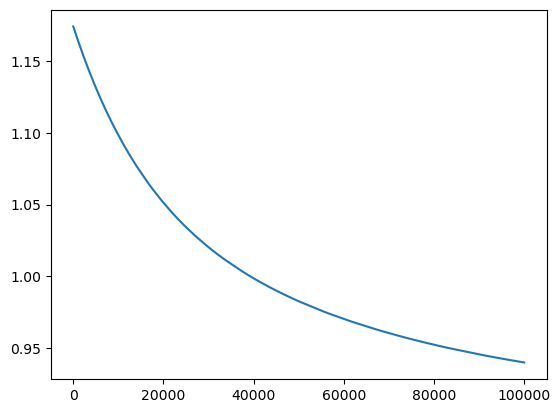

In [81]:
plt.plot(losses)
plt.show()


## Saving model

In [82]:
torch.save(model.state_dict(), "./model/model.pt")

## Loading model

In [83]:
model.load_state_dict(
    torch.load("./model/model.pt", weights_only=True)
)
model.eval()

Linear(in_features=2, out_features=1, bias=True)